### Problem 7

[Text(0.5, 0, 'Specificity'),
 Text(0, 0.5, 'Posteriror'),
 Text(0.5, 1.0, 'Posterior vs Specificity')]

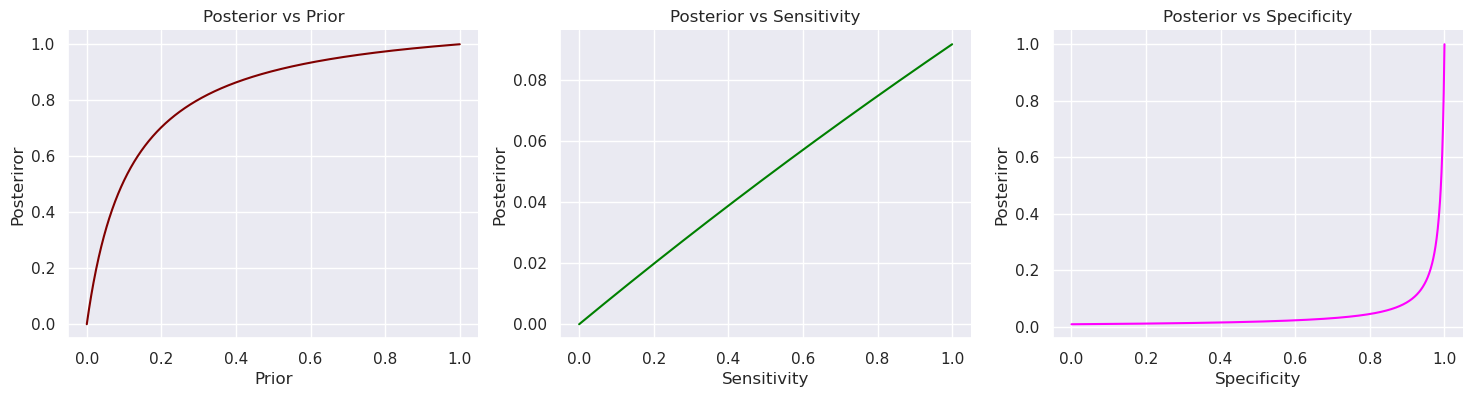

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

<Figure size 640x480 with 0 Axes>

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

# computes posterior using bayes theorem
def compute_posterior(prior=0.01, sensitivity=0.95, specificity=0.9):
    '''
    Compute posterior probability of being sick (s) given positive test (p).

    Random variables:
        T, R_T = {n (negative), p (positive)}
        D, R_D = {s (sick), h (healthy)}

    Parameters:
        prior: float
            Probability of being sick i.e. P(D=s)

        sensitivity: float
            Probability of true positive i.e. P(T=p|D=s)

        specificity: float
            Probability of true negative i.e. P(T=n|D=h)
    '''
    # compute posterior via baye's rule
    posterior = (sensitivity * prior / 
                 ( sensitivity * prior + (1 - specificity) * (1 - prior) )) # NOTE: P(T=p|D=h) = (1 - specificity), P(D=h) = (1 - prior)
    
    return posterior

# generate posterior values
x_lin = np.linspace(0, 1, 1000)
func_prior = compute_posterior(prior=x_lin)
func_sensi = compute_posterior(sensitivity=x_lin)
func_speci = compute_posterior(specificity=x_lin)

# generate plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(18, 4))
sns.despine()
sns.set_theme(style="darkgrid")

plt.figure()
g1 = sns.lineplot(y=func_prior, x=x_lin, color='maroon', ax=ax1)
g1.set(xlabel="Prior", ylabel="Posteriror", title='Posterior vs Prior')

plt.figure()
g2 = sns.lineplot(y=func_sensi, x=x_lin, color='green', ax=ax2)
g2.set(xlabel="Sensitivity", ylabel="Posteriror", title='Posterior vs Sensitivity')

plt.figure()
g2 = sns.lineplot(y=func_speci, x=x_lin, color='magenta', ax=ax3)
g2.set(xlabel="Specificity", ylabel="Posteriror", title='Posterior vs Specificity')


### Bonus 7 attempt

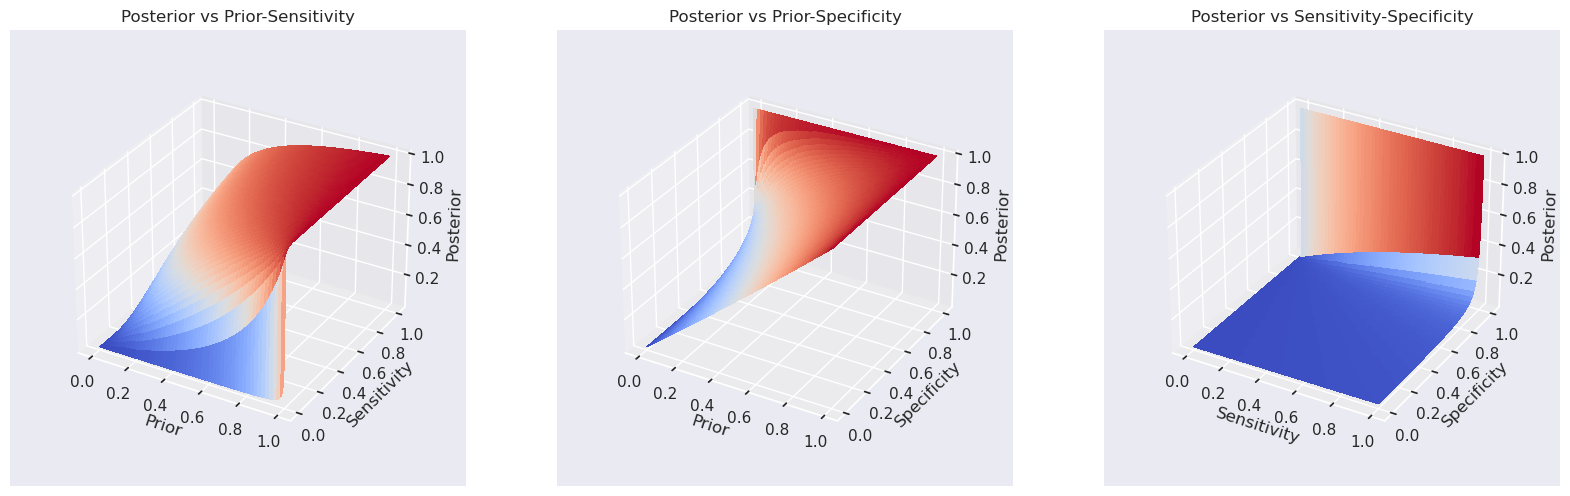

In [3]:
from matplotlib import cm 

# prepare meshgrid for surface plot
x_lin = np.linspace(0.0001, 1, 1000)
x, y = np.meshgrid(x_lin, x_lin)
# get posterior values
func_prior_sensi = compute_posterior(prior=x, sensitivity=y)
func_prior_speci = compute_posterior(prior=x, specificity=y)
func_sensi_speci = compute_posterior(sensitivity=x, specificity=y)

# generate plots
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, subplot_kw={"projection": "3d"}, figsize=(20, 8))

ax1.plot_surface(x, y, func_prior_sensi, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax1.set_xlabel('Prior')
ax1.set_ylabel('Sensitivity')
ax1.set_zlabel('Posterior')
ax1.set_title('Posterior vs Prior-Sensitivity')
ax1.set_box_aspect(aspect=None, zoom=0.83)

ax2.plot_surface(x, y, func_prior_speci, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax2.set_xlabel('Prior')
ax2.set_ylabel('Specificity')
ax2.set_zlabel('Posterior')
ax2.set_title('Posterior vs Prior-Specificity')
ax2.set_box_aspect(aspect=None, zoom=0.83)

ax3.plot_surface(x, y, func_sensi_speci, cmap=cm.coolwarm, linewidth=0, antialiased=False)
ax3.set_xlabel('Sensitivity')
ax3.set_ylabel('Specificity')
ax3.set_zlabel('Posterior')
ax3.set_title('Posterior vs Sensitivity-Specificity')
ax3.set_box_aspect(aspect=None, zoom=0.83)


### Problem 8

In [4]:
def approx_pi(N=10, seed=42):
    '''
    Approximate pi via Monte Carlo sampling. Uses ratio of points
    inside circle equation (x^2 + y^2 <= r, r radius) to N samples times 4.

    pi ~= 4 * inside_circle / N   (Eq. 1)

    Parameters:
        N: int
            Number of random samples.
        seed: int
            Seed for random number generator.
    '''
    # set random number generator
    rng = np.random.default_rng(seed)
    # generate N random samples
    s = rng.uniform(-1,1, size=[N, 2])
    # compute sample location via circle equation
    s = np.square(s[:, 0]) + np.square(s[:, 1])

    # return number of samples <= 1 (samples inside circle, radius=1) and use Eq. 1
    return s[s <= 1].shape[0] * 4 / N

# run simulations
steps = 24
# approximate using 1 to 2^23 random samples
sims = [approx_pi(2**(i)) for i in range(steps)]
sims[-1]

3.1415200233459473

[Text(0.5, 0, 'Step'),
 Text(0, 0.5, 'Error %'),
 Text(0.5, 1.0, 'Approximation Error of Pi')]

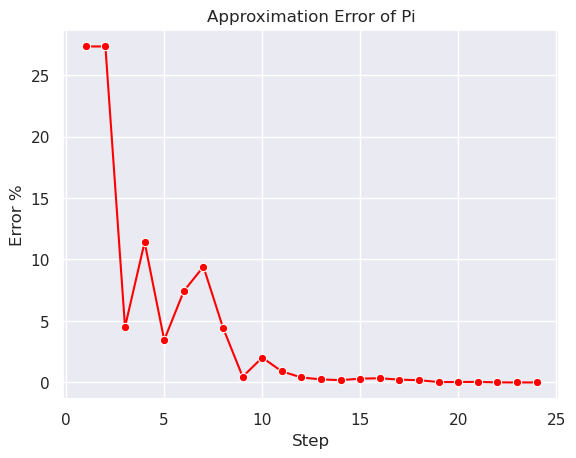

In [5]:
import seaborn as sns

# calculate error percentages
sims = np.array(sims)
app_error = np.abs(sims - np.pi) * 100 / np.pi

sns.despine()
sns.set_theme(style="darkgrid")
g = sns.lineplot(x=range(1, steps+1), y=app_error, marker='o', color='red')
g.set(xlabel="Step", ylabel="Error %", title='Approximation Error of Pi')

### Problem 9

In [8]:
import numpy as np
from scipy.stats import multivariate_normal

# ChatGPT-----------------------------------------------------------------------------------
def multivariate_normal_density(x, mu, Sigma):
    """
    Calculate the multivariate normal density of a D-dimensional vector x.

    Parameters:
    - x: D-dimensional vector
    - mu: D-dimensional mean (location) vector
    - Sigma: D×D-dimensional covariance matrix

    Returns:
    - density: The density of the vector x
    """
    D = len(x)
    if len(mu) != D or Sigma.shape != (D, D):
        raise ValueError("Input dimensions do not match.")

    normalization = (2 * np.pi)**(-D/2) * np.linalg.det(Sigma)**(-0.5)
    exponent = -0.5 * np.dot(np.dot((x - mu).T, np.linalg.inv(Sigma)), (x - mu))
    density = normalization * np.exp(exponent)

    return density
#-------------------------------------------------------------------------------------------
# Example parameterizations
mean_vector_spherical = np.array([1, 2, 3])
covariance_matrix_spherical = np.eye(3)  # Spherical Gaussian (identity covariance)

mean_vector_diagonal = np.array([1, 2, 3])
covariance_matrix_diagonal = np.diag([2, 1, 0.5])  # Diagonal Gaussian

mean_vector_full = np.array([1, 2, 3])
covariance_matrix_full = np.array([[2, 0.5, 0.3], [0.5, 1, 0.2], [0.3, 0.2, 0.8]])

sample_vector = np.array([1.5, 2.5, 3.5])

result_custom_function = multivariate_normal_density(sample_vector, mean_vector_full, covariance_matrix_full)
print("Custom Function Result:", result_custom_function)

# Testing with scipy.stats.multivariate_normal
result_scipy = multivariate_normal.pdf(sample_vector, mean_vector_full, covariance_matrix_full)
print("SciPy Result:", result_scipy)


Custom Function Result: 0.04413196993535608
SciPy Result: 0.044131969935356084
